In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from config import *

CATEGORIES_REVERSE = {v: k for k, v in CATEGORIES_CODES.items()}

In [3]:
class DataLoader:
    __slots__ = ('images', '__index', 'labels', '_size', 'data')
    shape = (224, 224, 1)
    
    def __init__(self, _path: str) -> None:
        self.data = pd.read_csv(_path)
        self.__index, self._size = 0, self.data.shape[0]
        
        self.images = np.empty((self._size,) + self.shape, dtype='float16')
        self.labels = np.empty(self._size, dtype='uint8')

    def load_data(self) -> None:
        for _, _path, _categories in self.data.values:
            self.add_image(_path, _categories)

    def add_image(self, _path: str, category: int) -> None:
        image_path = f"data/train/{CATEGORIES_REVERSE[category]}/{_path}"
        img = ~cv2.imread(image_path, 0) / 255
        
        self.images[self.__index] = np.asarray(img, dtype='float16').reshape(self.shape)
        self.labels[self.__index] = category
        self.__index += 1
        
        if self.__index == self._size:
            self.labels = to_categorical(self.labels)
            print(f"[+] DONE {self._size}/{self._size}")
            return
        
        print(f"[+] Progress: {self.__index}/{self._size}")
    
    def show_image(self, index: int) -> None:
        plt.imshow(self.images[index], cmap='gray')

[+] Progress: 1/14629
[+] Progress: 2/14629
[+] Progress: 3/14629
[+] Progress: 4/14629
[+] Progress: 5/14629
[+] Progress: 6/14629
[+] Progress: 7/14629
[+] Progress: 8/14629
[+] Progress: 9/14629
[+] Progress: 10/14629
[+] Progress: 11/14629
[+] Progress: 12/14629
[+] Progress: 13/14629
[+] Progress: 14/14629
[+] Progress: 15/14629
[+] Progress: 16/14629
[+] Progress: 17/14629
[+] Progress: 18/14629
[+] Progress: 19/14629
[+] Progress: 20/14629
[+] Progress: 21/14629
[+] Progress: 22/14629
[+] Progress: 23/14629
[+] Progress: 24/14629
[+] Progress: 25/14629
[+] Progress: 26/14629
[+] Progress: 27/14629
[+] Progress: 28/14629
[+] Progress: 29/14629
[+] Progress: 30/14629
[+] Progress: 31/14629
[+] Progress: 32/14629
[+] Progress: 33/14629
[+] Progress: 34/14629
[+] Progress: 35/14629
[+] Progress: 36/14629
[+] Progress: 37/14629
[+] Progress: 38/14629
[+] Progress: 39/14629
[+] Progress: 40/14629
[+] Progress: 41/14629
[+] Progress: 42/14629
[+] Progress: 43/14629
[+] Progress: 44/146

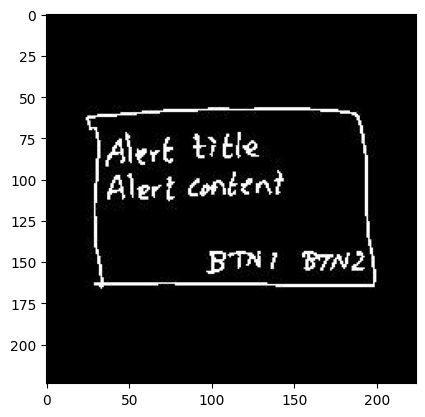

In [4]:
train_set_path = 'data/processed/train_set.csv'
train_data = DataLoader(train_set_path)
train_data.load_data()
train_data.show_image(301)

[+] Progress: 1/770
[+] Progress: 2/770
[+] Progress: 3/770
[+] Progress: 4/770
[+] Progress: 5/770
[+] Progress: 6/770
[+] Progress: 7/770
[+] Progress: 8/770
[+] Progress: 9/770
[+] Progress: 10/770
[+] Progress: 11/770
[+] Progress: 12/770
[+] Progress: 13/770
[+] Progress: 14/770
[+] Progress: 15/770
[+] Progress: 16/770
[+] Progress: 17/770
[+] Progress: 18/770
[+] Progress: 19/770
[+] Progress: 20/770
[+] Progress: 21/770
[+] Progress: 22/770
[+] Progress: 23/770
[+] Progress: 24/770
[+] Progress: 25/770
[+] Progress: 26/770
[+] Progress: 27/770
[+] Progress: 28/770
[+] Progress: 29/770
[+] Progress: 30/770
[+] Progress: 31/770
[+] Progress: 32/770
[+] Progress: 33/770
[+] Progress: 34/770
[+] Progress: 35/770
[+] Progress: 36/770
[+] Progress: 37/770
[+] Progress: 38/770
[+] Progress: 39/770
[+] Progress: 40/770
[+] Progress: 41/770
[+] Progress: 42/770
[+] Progress: 43/770
[+] Progress: 44/770
[+] Progress: 45/770
[+] Progress: 46/770
[+] Progress: 47/770
[+] Progress: 48/770
[

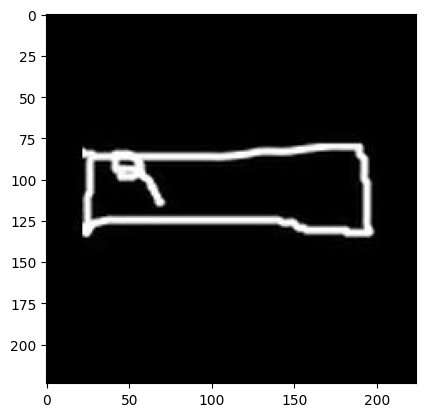

In [5]:
test_set_path = 'data/processed/test_set.csv'
test_data = DataLoader(test_set_path)
test_data.load_data()
test_data.show_image(300)

In [52]:
class SketchClassificator:
    __slots__ = ('_data', '_shape', 'num_classes', 'model', 'version')
    
    def __init__(self, data, _version: str) -> None:
        self._data = data
        self._shape = data.shape
        self.num_classes = len(CATEGORIES_CODES)
        self.model = models.Sequential()
        self.version = _version

    def build_model(self) -> None:
        activation, final_activation = 'relu', 'softmax'
        kernel_size, pool_size = (6, 6), (4, 4)
        
        self.model.add(layers.Conv2D(32, kernel_size, activation=activation, input_shape=self._shape))
        self.model.add(layers.MaxPooling2D(pool_size=pool_size))
        self.model.add(layers.Conv2D(64, kernel_size=kernel_size, activation=activation))
        self.model.add(layers.MaxPooling2D(pool_size=pool_size))
        self.model.add(layers.Conv2D(128, kernel_size=kernel_size, activation=activation))
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(128, activation=activation))
        self.model.add(layers.Dense(self.num_classes, activation=final_activation))
        
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    def train(self) -> None:
        self.model.fit(self._data.images, self._data.labels, epochs=12, batch_size=64, validation_split=0.05)
    
    def save(self) -> None:
        self.model.save(f'models/model_v{self.version}.h5')
     
     
model_version = '0.1.9'   
sketch_model = SketchClassificator(train_data, model_version)
sketch_model.build_model()
sketch_model.train()
sketch_model.save()

del sketch_model

Epoch 1/12
218/218 [==============================] - 87s 396ms/step - loss: 1.6247 - accuracy: 0.5044 - val_loss: 1.1633 - val_accuracy: 0.6243
Epoch 2/12
218/218 [==============================] - 86s 392ms/step - loss: 0.9776 - accuracy: 0.6914 - val_loss: 0.9579 - val_accuracy: 0.7090
Epoch 3/12
218/218 [==============================] - 87s 397ms/step - loss: 0.7224 - accuracy: 0.7705 - val_loss: 0.8768 - val_accuracy: 0.7227
Epoch 4/12
218/218 [==============================] - 86s 397ms/step - loss: 0.5334 - accuracy: 0.8284 - val_loss: 0.8479 - val_accuracy: 0.7609
Epoch 5/12
218/218 [==============================] - 86s 392ms/step - loss: 0.3789 - accuracy: 0.8764 - val_loss: 0.9495 - val_accuracy: 0.7459
Epoch 6/12
218/218 [==============================] - 86s 395ms/step - loss: 0.2783 - accuracy: 0.9076 - val_loss: 1.0239 - val_accuracy: 0.7623
Epoch 7/12
218/218 [==============================] - 86s 393ms/step - loss: 0.2009 - accuracy: 0.9342 - val_loss: 1.1959 - val_ac

In [53]:
model_test = load_model(f'models/model_v0.1.1.h5')
test_loss, test_accuracy = model_test.evaluate(test_data.images, test_data.labels)
print(f'Test accuracy: {test_accuracy}')

model_test = load_model(f'models/model_v0.1.8.h5')
test_loss, test_accuracy = model_test.evaluate(test_data.images, test_data.labels)
print(f'Test accuracy: {test_accuracy}')

model_test = load_model(f'models/model_v{model_version}.h5')
test_loss, test_accuracy = model_test.evaluate(test_data.images, test_data.labels)
print(f'Test accuracy: {test_accuracy}')

25/25 [==============================] - 3s 125ms/step - loss: 1.2615 - accuracy: 0.7792
Test accuracy: 0.7792207598686218
25/25 [==============================] - 2s 65ms/step - loss: 1.4783 - accuracy: 0.7662
Test accuracy: 0.7662337422370911
25/25 [==============================] - 2s 66ms/step - loss: 1.3257 - accuracy: 0.7675
Test accuracy: 0.767532467842102
